In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
# Standard ratings of the LaLiga 19-20 season

offstats = pd.read_excel('Standard.xlsx')
offstats.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,G+A-PK,xG,npxG,xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA,Matches
0,1,David Soria,es ESP,GK,Getafe,26.0,1993.0,38,38,3.420,...,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Matches
1,2,Jan Oblak,si SVN,GK,Atlético Madrid,26.0,1993.0,38,38,3.395,...,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Matches
2,3,Jesús Navas,es ESP,DF,Sevilla,33.0,1985.0,38,37,3.369,...,0.19,0.2,0.2,6.4,0.01,0.17,0.18,0.01,0.18,Matches
3,4,Iago Aspas,es ESP,FW,Celta Vigo,31.0,1987.0,37,37,3.262,...,0.33,13.9,8.6,4.1,0.38,0.11,0.50,0.24,0.35,Matches
4,5,Aitor Fernández,es ESP,GK,Levante,28.0,1991.0,36,36,3.240,...,0.00,0.0,0.0,0.2,0.00,0.01,0.01,0.00,0.01,Matches


In [3]:
offstats = offstats.where(offstats['Pos']!='GK').dropna()
offstats.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,G+A-PK,xG,npxG,xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA,Matches
2,3.0,Jesús Navas,es ESP,DF,Sevilla,33.0,1985.0,38.0,37.0,3.369,...,0.19,0.2,0.2,6.4,0.01,0.17,0.18,0.01,0.18,Matches
3,4.0,Iago Aspas,es ESP,FW,Celta Vigo,31.0,1987.0,37.0,37.0,3.262,...,0.33,13.9,8.6,4.1,0.38,0.11,0.50,0.24,0.35,Matches
7,8.0,Raúl Albiol,es ESP,DF,Villarreal,33.0,1985.0,36.0,36.0,3.237,...,0.03,1.4,1.4,0.4,0.04,0.01,0.05,0.04,0.05,Matches
8,9.0,Marc Cucurella,es ESP,"MF,DF",Getafe,21.0,1998.0,37.0,37.0,3.237,...,0.17,1.8,1.8,4.7,0.05,0.13,0.18,0.05,0.18,Matches
10,11.0,Martin Valjent,sk SVK,DF,Mallorca,23.0,1995.0,36.0,36.0,3.182,...,0.00,0.5,0.5,0.6,0.02,0.02,0.03,0.02,0.03,Matches


In [4]:
offstats.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', 'MP', 'Starts',
       'Min', 'Gls', 'Ast', 'PK', 'PKatt', 'CrdY', 'CrdR', 'Gls.1', 'Ast.1',
       'G+A', 'G-PK', 'G+A-PK', 'xG', 'npxG', 'xA', 'xG.1', 'xA.1', 'xG+xA',
       'npxG.1', 'npxG+xA', 'Matches'],
      dtype='object')

In [5]:
columns_to_keep = ['Player','Nation','Pos','Squad','Min','Gls.1','Ast.1','G+A','xG+xA']
data = offstats[columns_to_keep].reset_index().drop('index',axis=1)
data = data.head(293) # data is ordered by minutes played. We keep just the players that played more than 1000 minutes
data.head(10)

,Player,Nation,Pos,Squad,Min,Gls.1,Ast.1,G+A,xG+xA
0,Jesús Navas,es ESP,DF,Sevilla,3.369,0.00,0.19,0.19,0.18
1,Iago Aspas,es ESP,FW,Celta Vigo,3.262,0.39,0.08,0.47,0.50
2,Raúl Albiol,es ESP,DF,Villarreal,3.237,0.03,0.00,0.03,0.05
3,Marc Cucurella,es ESP,"MF,DF",Getafe,3.237,0.03,0.14,0.17,0.18
4,Martin Valjent,sk SVK,DF,Mallorca,3.182,0.00,0.00,0.00,0.03
5,Sergio Canales,es ESP,"MF,FW",Betis,3.163,0.17,0.17,0.34,0.36
6,José Campaña,es ESP,MF,Levante,3.156,0.06,0.20,0.26,0.22
7,Lucas Olaza,uy URU,DF,Celta Vigo,3.144,0.03,0.09,0.11,0.13
8,Karim Benzema,fr FRA,FW,Real Madrid,3.141,0.60,0.23,0.83,0.74
9,Mikel Merino,es ESP,MF,Real Sociedad,3.139,0.14,0.03,0.17,0.14


In [6]:
passing_stats = pd.read_excel('Passing.xlsx')
columns_to_keep = ['Player','Cmp%','KP','PPA']
passing_stats = passing_stats[columns_to_keep]
passing_stats.head()

,Player,Cmp%,KP,PPA
0,Lionel Messi,79.4,2.69,3.94
1,Sergio Canales,84.0,2.17,1.68
2,José Campaña,77.8,2.11,1.23
3,Santi Cazorla,81.6,2.43,1.80
4,Toni Kroos,88.9,2.14,1.25


In [7]:
possession_stats = pd.read_excel('Possession.xlsx')
columns_to_keep = ['Player','Succ','Carries','Miscon','Dispos']
possession_stats = possession_stats[columns_to_keep]
possession_stats.head()

,Player,Succ,Carries,Miscon,Dispos
0,Sergio Bermejo,10.00,50.0,0.00,10.00
1,Joan Monterde Raygal,10.00,80.0,0.00,0.00
2,Roberto López,6.67,113.3,0.00,10.00
3,Lionel Messi,5.78,69.6,2.03,2.75
4,Amath,5.71,40.0,4.29,7.14


In [8]:
shooting_stats = pd.read_excel('Shooting.xlsx')
columns_to_keep = ['Player','G/Sh']
shooting_stats = shooting_stats[columns_to_keep]
shooting_stats.head()

,Player,G/Sh
0,Kévin Gameiro,0.32
1,Arturo Vidal,0.32
2,Maxi Gómez,0.23
3,Charles,0.22
4,Ansu Fati,0.21


In [9]:
data = pd.merge(data,passing_stats,how='left',left_on='Player',right_on='Player')
data.shape

(307, 12)

In [10]:
data= pd.merge(data,possession_stats,how='left',left_on='Player',right_on='Player')
data.shape

(339, 16)

In [11]:
data = pd.merge(data,shooting_stats,how='left',left_on='Player',right_on='Player')
data.shape

(343, 17)

In [13]:
data = data.drop_duplicates(subset='Player',keep='first').set_index('Player')
data = data.fillna(0).sort_values(by='xG+xA',ascending=False)
data.shape

(291, 16)

In [14]:
data = data.where(data['Pos']!='DF').dropna() # removing the players that are centre-backs
data

,Nation,Pos,Squad,Min,Gls.1,Ast.1,G+A,xG+xA,Cmp%,KP,PPA,Succ,Carries,Miscon,Dispos,G/Sh
Player,,,,,,,,,,,,,,,,
Lionel Messi,ar ARG,"FW,MF",Barcelona,2.880,0.78,0.62,1.41,1.08,79.4,2.69,3.94,5.78,69.6,2.03,2.75,0.13
Luis Suárez,uy URU,FW,Barcelona,1.998,0.72,0.36,1.08,0.79,75.9,1.35,0.86,1.13,25.8,1.71,1.35,0.19
Karim Benzema,fr FRA,FW,Real Madrid,3.141,0.60,0.23,0.83,0.74,84.2,1.75,1.66,1.12,33.6,1.69,1.20,0.14
Álvaro Morata,es ESP,FW,Atlético Madrid,2.098,0.51,0.09,0.60,0.72,66.9,0.99,0.69,0.82,19.6,3.56,2.10,0.16
Gerard Moreno,es ESP,"FW,MF",Villarreal,2.744,0.59,0.16,0.75,0.65,72.3,1.64,1.34,2.00,34.1,3.11,1.54,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Francis Coquelin,fr FRA,MF,Valencia,1.905,0.00,0.00,0.00,0.03,89.9,0.33,0.38,0.99,39.8,0.90,1.08,0.00
Nemanja Gudelj,rs SRB,"MF,DF",Sevilla,1.216,0.00,0.00,0.00,0.03,90.6,0.15,0.22,0.81,38.1,0.30,0.59,0.00
Igor Zubeldia,es ESP,"MF,DF",Real Sociedad,2.640,0.00,0.03,0.03,0.03,87.8,0.17,0.03,0.78,47.8,0.34,0.61,0.00


In [15]:
less_efective = data['G+A'] - data['xG+xA']
less_efective = less_efective[less_efective<0].sort_values()
less_efective = less_efective.head(10)
less_efective

Player
Pedro León        -0.20
Vinicius Júnior   -0.19
Wu Lei            -0.17
Guido Carrillo    -0.17
Adrián López      -0.17
João Félix        -0.15
Antoñito          -0.15
Luis Rioja        -0.15
Sandro Ramírez    -0.15
Rodrygo           -0.14
dtype: float64

In [16]:
most_efective = data['G+A'] - data['xG+xA']
most_efective = most_efective[most_efective>0].sort_values(ascending=False).head(10)
most_efective

Player
Lionel Messi              0.33
Ángel Rodríguez           0.30
Luis Suárez               0.29
Arthur Melo               0.27
Ansu Fati                 0.22
Luka Modrić               0.21
Munir El Haddadi          0.18
Santi Cazorla             0.18
Óscar Rodríguez Arnaiz    0.17
Adnan Januzaj             0.16
dtype: float64

In [17]:
data.columns

Index(['Nation', 'Pos', 'Squad', 'Min', 'Gls.1', 'Ast.1', 'G+A', 'xG+xA',
       'Cmp%', 'KP', 'PPA', 'Succ', 'Carries', 'Miscon', 'Dispos', 'G/Sh'],
      dtype='object')

**LEGEND**

G: Goals/90min
A: Assists/90min
xG: Expected goals/90min
xA: Expected assists/90min
Cmp%: Passing accuracy (%)
KP: KeyPasses/90min
PPA: Passes into penalty area/90min
Succ: Successful dribbles/90min
Carries: Number of balls received/90min
Miscon: Bad controls/90min
Dispos: Dispossessed/90min
G/Sh: Goals per shot/90min

**Data: FBRef.com**

### Let's create a formula in order to figure out the offensive efficiency rate for the 180 atacking players of our dataset

**Effrate** = (xGoals+xAssists/90min x [(Keypasses/90min + Passes PPA/90min) x %Passing accuracy + Succdribbles + Goals/Shot)] - (Dispossessed/90min + Unsucc. controls/90min)

In [18]:
data['Effrate'] = data['xG+xA'] * (((data['KP'] + data['PPA']) * (data['Cmp%']/100)) + data['Succ'] + data['G/Sh']) / (data['Dispos'] + data['Miscon'])
data['Effrate/Carry'] = (data['Effrate'] / data['Carries']) *100
data = data.sort_values(by='Effrate',ascending=False)
data

,Nation,Pos,Squad,Min,Gls.1,Ast.1,G+A,xG+xA,Cmp%,KP,PPA,Succ,Carries,Miscon,Dispos,G/Sh,Effrate,Effrate/Carry
Player,,,,,,,,,,,,,,,,,,
Lionel Messi,ar ARG,"FW,MF",Barcelona,2.880,0.78,0.62,1.41,1.08,79.4,2.69,3.94,5.78,69.6,2.03,2.75,0.13,2.524719,3.627470
Joaquín,es ESP,"MF,FW",Betis,2.060,0.35,0.13,0.48,0.48,80.4,2.66,2.45,2.53,45.4,1.14,1.27,0.19,1.360021,2.995642
Karim Benzema,fr FRA,FW,Real Madrid,3.141,0.60,0.23,0.83,0.74,84.2,1.75,1.66,1.12,33.6,1.69,1.20,0.14,1.057821,3.148277
Santi Cazorla,es ESP,MF,Villarreal,2.450,0.40,0.33,0.73,0.55,81.6,2.43,1.80,1.91,53.6,1.69,1.29,0.08,1.004337,1.873763
Toni Kroos,de GER,MF,Real Madrid,2.652,0.14,0.17,0.31,0.23,88.9,2.14,1.25,0.75,64.1,0.51,0.47,0.07,0.899748,1.403663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pere Pons,es ESP,MF,Alavés,1.088,0.08,0.08,0.17,0.10,74.1,0.41,0.33,0.33,25.1,1.98,1.32,0.00,0.026616,0.106041
Yan Brice Eteki,cm CMR,MF,Granada,1.499,0.00,0.00,0.00,0.04,79.2,0.18,0.12,0.78,21.2,0.48,1.08,0.00,0.026092,0.123077
Iddrisu Baba,gh GHA,MF,Mallorca,2.903,0.00,0.00,0.00,0.03,81.4,0.19,0.19,1.42,35.1,0.77,1.24,0.00,0.025811,0.073535


In [19]:
a = data['Effrate'].head(50).sort_values(ascending=True)
a

Player
Alexander Isak            0.297732
Portu                     0.300575
Aleix Vidal               0.301027
Héctor Herrera            0.302046
Lucas Ocampos             0.305876
José Campaña              0.311182
Fabián Orellana           0.316676
Borja Mayoral             0.323201
Willian José              0.326258
Unai López                0.326362
Diego Costa               0.326569
Ivan Rakitić              0.327007
Sandro Ramírez            0.343311
Nabil Fekir               0.344693
Gareth Bale               0.350725
Ferrán Torres             0.352069
Rubén García              0.353033
Rodrygo                   0.355369
Joan Jordán               0.355716
Koke                      0.359835
Óscar Rodríguez Arnaiz    0.373327
Éver Banega               0.375109
Rodrigo                   0.378082
João Félix                0.390500
Mikel Oyarzabal           0.418071
Luka Modrić               0.421853
Darwin Machís             0.430601
Lucas Pérez               0.430685
Ansu Fati    

<IPython.core.display.Javascript object>


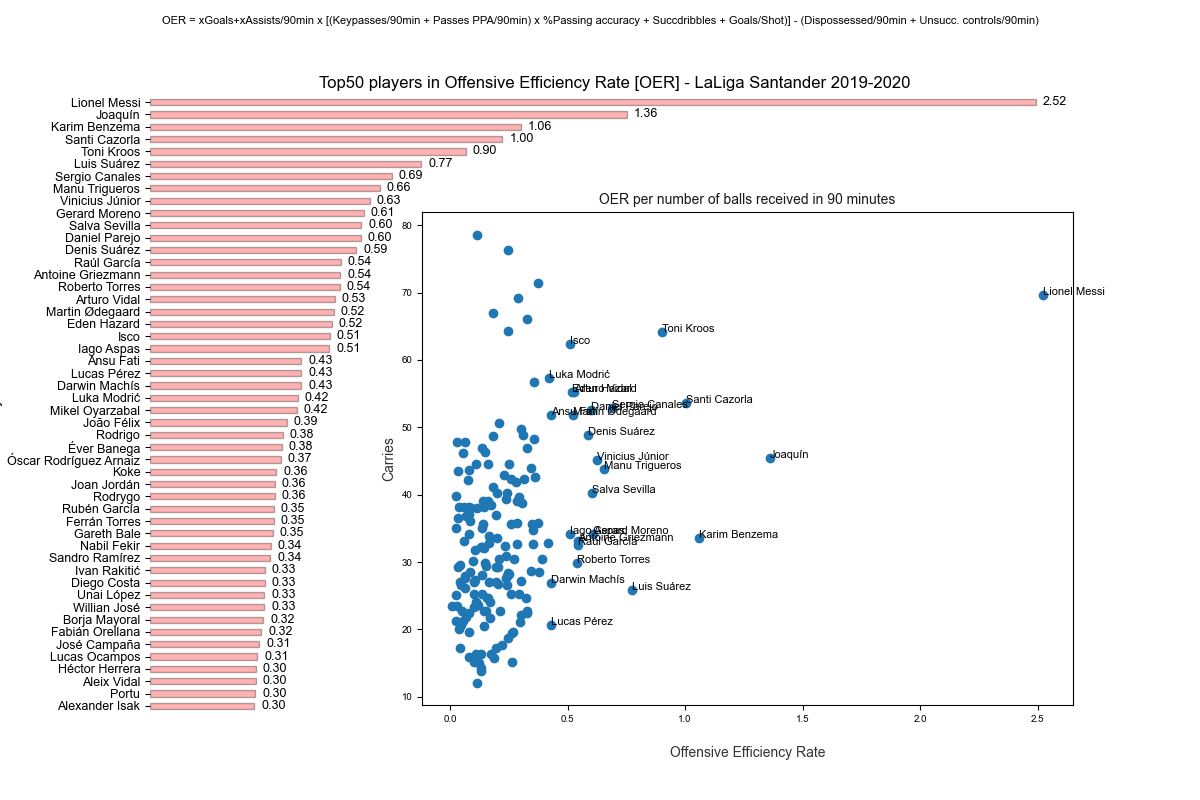

Text(0.5, 0.98, 'OER = xGoals+xAssists/90min x [(Keypasses/90min + Passes PPA/90min) x %Passing accuracy + Succdribbles + Goals/Shot)] - (Dispossessed/90min + Unsucc. controls/90min)')

In [20]:
plt.figure()
fig1 = a.plot.barh(figsize=(12,8),alpha=0.3,color='red',edgecolor='black');
plt.title('Top50 players in Offensive Efficiency Rate [OER] - LaLiga Santander 2019-2020',size=12)
plt.suptitle('OER = xGoals+xAssists/90min x [(Keypasses/90min + Passes PPA/90min) x %Passing accuracy + Succdribbles + Goals/Shot)] - (Dispossessed/90min + Unsucc. controls/90min)',size=8)

In [21]:
for spine in plt.gca().spines.values():
    spine.set_visible(False) 
for item in plt.gca().yaxis.get_ticklabels():
    item.set_fontsize(9)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.show()

In [22]:
rects = fig1.patches
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:.2f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha,
        size=9)                      # Horizontally align label differently for
                                    # positive and negative values.
plt.show()

<IPython.core.display.Javascript object>


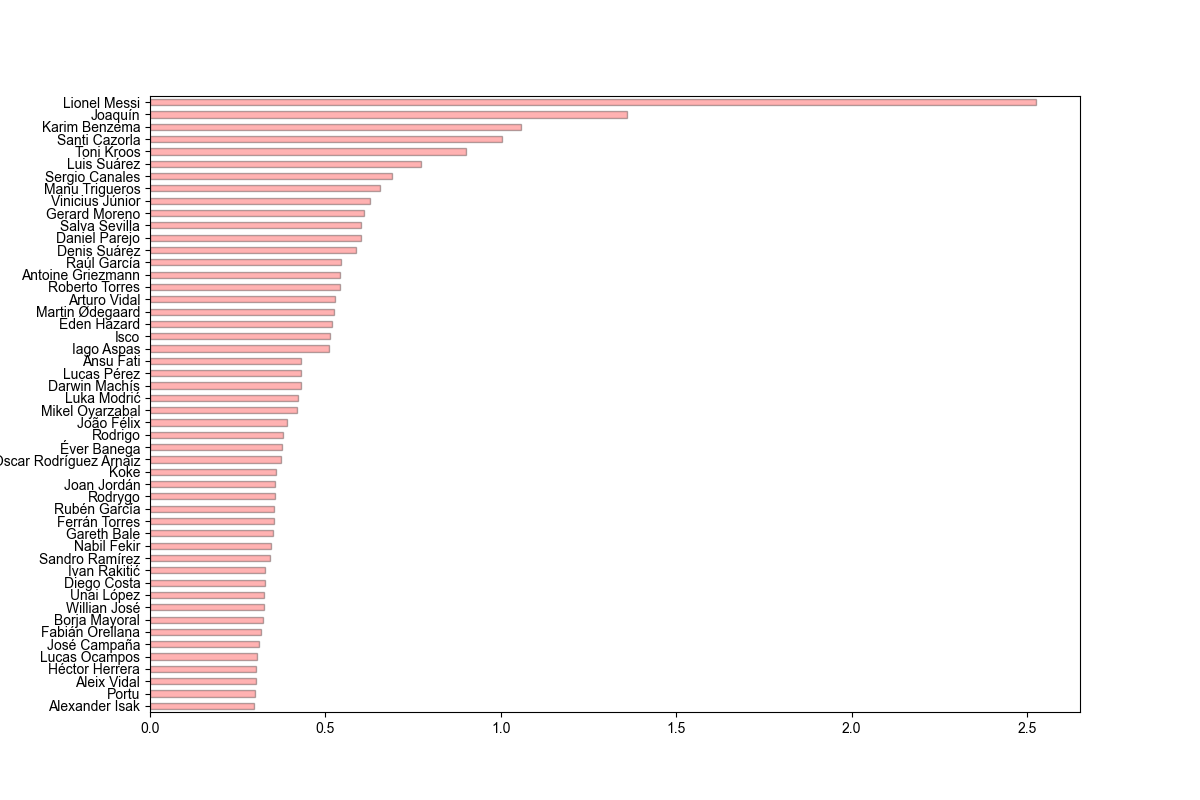

In [23]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il
ax2 = mpl_il.inset_axes(plt.gca(), width='70%', height='80%', loc=4)
ax2.scatter(data['Effrate'],data['Carries'])
ax2.set_title('OER per number of balls received in 90 minutes',size=10,alpha=0.9)
plt.xlabel('\nOffensive Efficiency Rate',alpha=0.8,size=10)
plt.ylabel('\nCarries',alpha=0.8,size=10)

for item in plt.gca().yaxis.get_ticklabels():
    item.set_fontsize(7)
for item in plt.gca().xaxis.get_ticklabels():
    item.set_fontsize(7)
# Hide the right and top spines
plt.figure()
fig1 = a.plot.barh(figsize=(12,8),alpha=0.3,color='red',edgecolor='black');

# Only show ticks on the left and bottom spines
ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('bottom')
plt.show()

In [24]:
for i, txt in enumerate(data.index[:25]):
    ax2.annotate(txt, (data.head(25)['Effrate'][i], data.head(25)['Carries'][i]),size=8)

In [25]:
plt.savefig('Assignment4x.png',dpi=105)

C:\Users\aleex\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


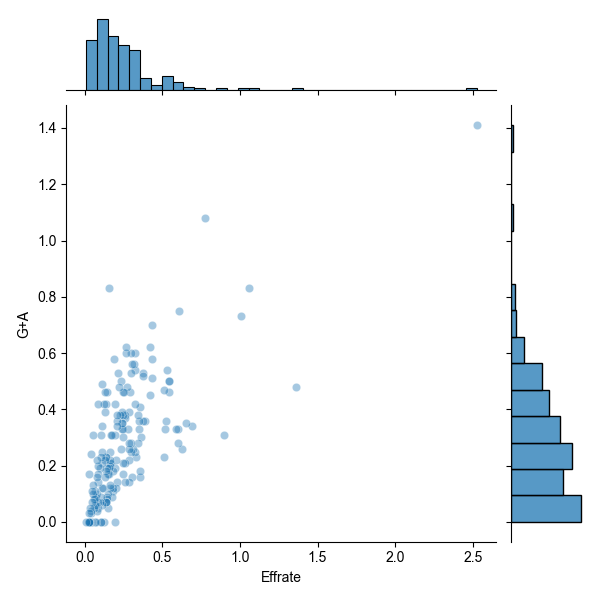

In [26]:
import seaborn as sns

a = sns.jointplot(data['Effrate'],data['G+A'],alpha=0.4);

<IPython.core.display.Javascript object>


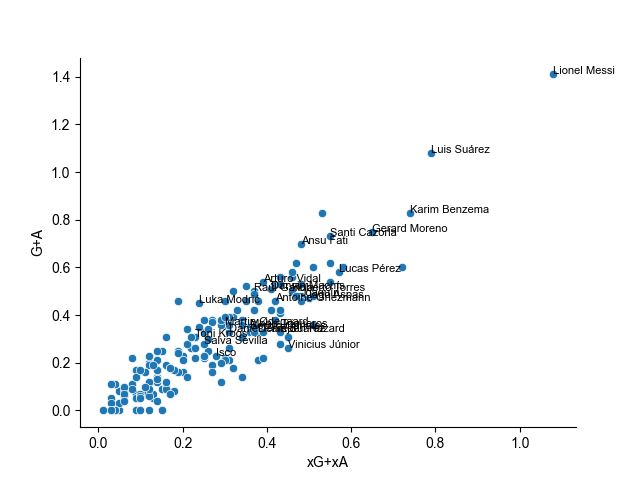

C:\Users\aleex\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [27]:
plt.figure()
fig3 = sns.scatterplot(data['xG+xA'],data['G+A'])
sns.despine()

In [28]:
for i, txt in enumerate(data.index[:25]):
    fig3.annotate(txt, (data.head(25)['xG+xA'][i], data.head(25)['G+A'][i]),size=8)

<IPython.core.display.Javascript object>


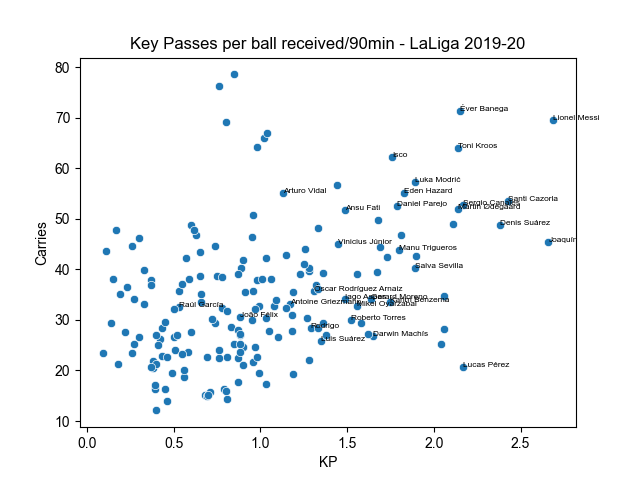

C:\Users\aleex\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Key Passes per ball received/90min - LaLiga 2019-20')

In [29]:
plt.figure()
fig3 = sns.scatterplot(data['KP'],data['Carries'])
plt.title('Key Passes per ball received/90min - LaLiga 2019-20')

In [30]:
for i, txt in enumerate(data.index[:30]):
    fig3.annotate(txt, (data.head(30)['KP'][i], data.head(30)['Carries'][i]),size=6)

In [31]:
data.loc['Lucas Pérez']

Nation             es ESP
Pos                    FW
Squad              Alavés
Min                 2.496
Gls.1                 0.4
Ast.1                0.18
G+A                  0.58
xG+xA                0.57
Cmp%                 63.5
KP                   2.17
PPA                  0.97
Succ                 0.76
Carries              20.6
Miscon               1.99
Dispos               1.84
G/Sh                 0.14
Effrate          0.430685
Effrate/Carry    2.090703
Name: Lucas Pérez, dtype: object

<IPython.core.display.Javascript object>


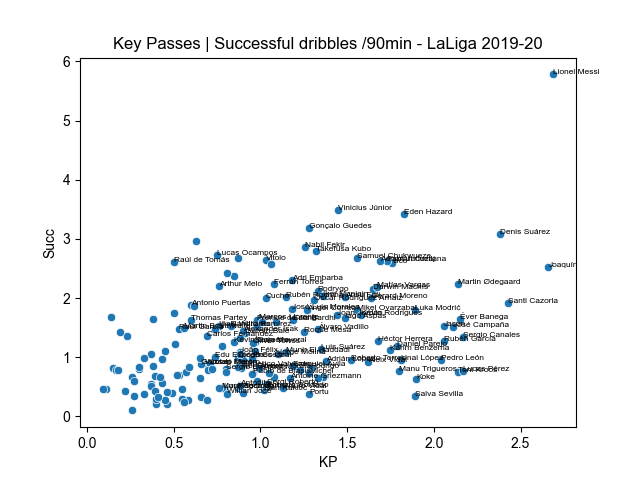

C:\Users\aleex\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Key Passes | Successful dribbles /90min - LaLiga 2019-20')

In [32]:
plt.figure()
fig4=sns.scatterplot(data['KP'],data['Succ'])
plt.title('Key Passes | Successful dribbles /90min - LaLiga 2019-20')

In [33]:
for i, txt in enumerate(data.index[:100]):
    fig4.annotate(txt, (data.head(100)['KP'][i], data.head(100)['Succ'][i]),size=6)

In [34]:
data.sort_values(by='KP',ascending=False).head(10)

,Nation,Pos,Squad,Min,Gls.1,Ast.1,G+A,xG+xA,Cmp%,KP,PPA,Succ,Carries,Miscon,Dispos,G/Sh,Effrate,Effrate/Carry
Player,,,,,,,,,,,,,,,,,,
Lionel Messi,ar ARG,"FW,MF",Barcelona,2.880,0.78,0.62,1.41,1.08,79.4,2.69,3.94,5.78,69.6,2.03,2.75,0.13,2.524719,3.627470
Joaquín,es ESP,"MF,FW",Betis,2.060,0.35,0.13,0.48,0.48,80.4,2.66,2.45,2.53,45.4,1.14,1.27,0.19,1.360021,2.995642
Santi Cazorla,es ESP,MF,Villarreal,2.450,0.40,0.33,0.73,0.55,81.6,2.43,1.80,1.91,53.6,1.69,1.29,0.08,1.004337,1.873763
Denis Suárez,es ESP,"MF,FW",Celta Vigo,1.630,0.06,0.28,0.33,0.38,75.8,2.38,1.93,3.09,48.8,1.49,2.65,0.05,0.588080,1.205083
Sergio Canales,es ESP,"MF,FW",Betis,3.163,0.17,0.17,0.34,0.36,84.0,2.17,1.68,1.34,52.8,1.14,1.28,0.06,0.689355,1.305597
Lucas Pérez,es ESP,FW,Alavés,2.496,0.40,0.18,0.58,0.57,63.5,2.17,0.97,0.76,20.6,1.99,1.84,0.14,0.430685,2.090703
Éver Banega,ar ARG,MF,Sevilla,2.475,0.11,0.25,0.36,0.29,82.2,2.15,1.20,1.64,71.4,1.67,1.75,0.03,0.375109,0.525363
Toni Kroos,de GER,MF,Real Madrid,2.652,0.14,0.17,0.31,0.23,88.9,2.14,1.25,0.75,64.1,0.51,0.47,0.07,0.899748,1.403663
Martin Ødegaard,no NOR,MF,Real Sociedad,2.527,0.14,0.21,0.36,0.30,80.9,2.14,2.60,2.24,51.9,1.60,1.92,0.08,0.524545,1.010684


<IPython.core.display.Javascript object>


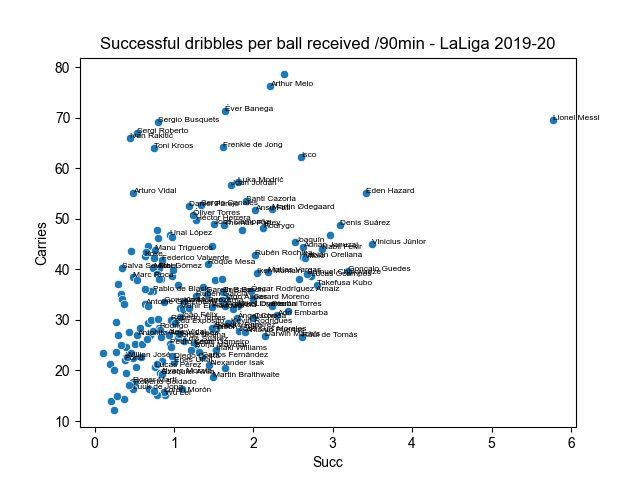

C:\Users\aleex\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Successful dribbles per ball received /90min - LaLiga 2019-20')

In [35]:
plt.figure()
fig5=sns.scatterplot(data['Succ'],data['Carries'])
plt.title('Successful dribbles per ball received /90min - LaLiga 2019-20')

In [36]:
for i, txt in enumerate(data.index[:100]):
    fig5.annotate(txt, (data.head(100)['Succ'][i], data.head(100)['Carries'][i]),size=6)

In [37]:
succ = data.sort_values(by='Succ',ascending=False).head(10)
succ = succ.Succ
succ

Player
Lionel Messi                  5.78
Vinicius Júnior               3.49
Eden Hazard                   3.42
Gonçalo Guedes                3.19
Denis Suárez                  3.09
Andre-Frank Zambo Anguissa    2.96
Nabil Fekir                   2.87
Takefusa Kubo                 2.80
Lucas Ocampos                 2.72
Samuel Chukwueze              2.68
Name: Succ, dtype: float64

<IPython.core.display.Javascript object>


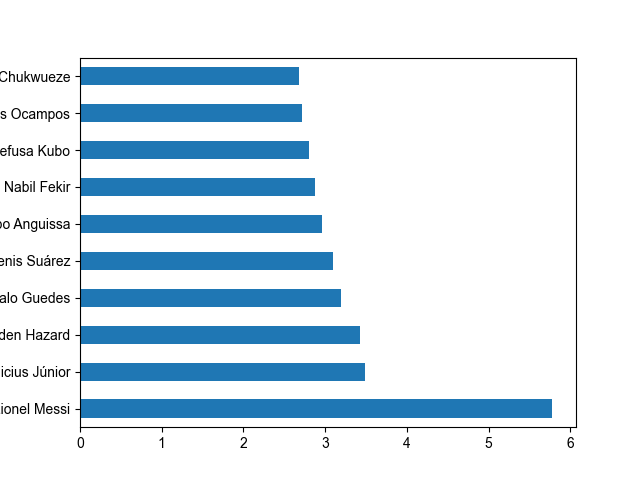

<AxesSubplot:ylabel='Player'>

In [38]:
plt.figure()
succ.plot.barh(succ.index,succ)

<IPython.core.display.Javascript object>


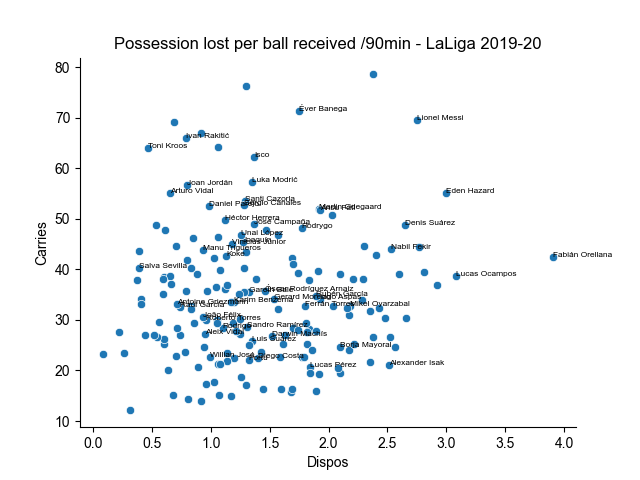

C:\Users\aleex\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Possession lost per ball received /90min - LaLiga 2019-20')

In [39]:
plt.figure()
fig6=sns.scatterplot(data['Dispos'],data['Carries'])
sns.despine()
plt.title('Possession lost per ball received /90min - LaLiga 2019-20')

In [40]:
for i, txt in enumerate(data.index[:50]):
    fig6.annotate(txt, (data.head(50)['Dispos'][i], data.head(50)['Carries'][i]),size=6)

In [41]:
data.sort_values(by='Dispos',ascending=False).head(10)

,Nation,Pos,Squad,Min,Gls.1,Ast.1,G+A,xG+xA,Cmp%,KP,PPA,Succ,Carries,Miscon,Dispos,G/Sh,Effrate,Effrate/Carry
Player,,,,,,,,,,,,,,,,,,
Fabián Orellana,cl CHI,"MF,FW",Eibar,2.390,0.30,0.26,0.56,0.46,72.6,1.73,1.20,2.63,42.4,3.16,3.91,0.11,0.316676,0.746879
Lucas Ocampos,ar ARG,FW,Sevilla,2.745,0.46,0.10,0.56,0.43,74.9,0.75,0.98,2.72,38.7,2.72,3.08,0.11,0.305876,0.790377
Eden Hazard,be BEL,"FW,MF",Real Madrid,1.077,0.08,0.25,0.33,0.43,85.4,1.83,1.17,3.42,55.2,2.00,3.00,0.05,0.518752,0.939768
Takefusa Kubo,jp JPN,"MF,FW",Mallorca,2.312,0.16,0.16,0.31,0.22,70.5,1.32,1.28,2.80,37.0,2.37,2.92,0.07,0.195588,0.528616
Matías Vargas,ar ARG,"FW,MF",Espanyol,1.024,0.00,0.26,0.26,0.31,65.9,1.67,2.02,2.19,39.4,3.25,2.81,0.00,0.236424,0.600061
Adnan Januzaj,be BEL,"FW,MF",Real Sociedad,1.167,0.23,0.23,0.46,0.30,65.1,1.69,1.92,2.62,44.5,3.31,2.77,0.12,0.251157,0.564397
Lionel Messi,ar ARG,"FW,MF",Barcelona,2.880,0.78,0.62,1.41,1.08,79.4,2.69,3.94,5.78,69.6,2.03,2.75,0.13,2.524719,3.627470
Ángel Correa,ar ARG,"MF,FW",Atlético Madrid,2.061,0.22,0.26,0.48,0.47,75.3,1.27,0.92,1.79,30.4,3.45,2.66,0.11,0.273005,0.898044
Denis Suárez,es ESP,"MF,FW",Celta Vigo,1.630,0.06,0.28,0.33,0.38,75.8,2.38,1.93,3.09,48.8,1.49,2.65,0.05,0.588080,1.205083


In [42]:
data.sort_values(by='Dispos',ascending=True).head(10)

,Nation,Pos,Squad,Min,Gls.1,Ast.1,G+A,xG+xA,Cmp%,KP,PPA,Succ,Carries,Miscon,Dispos,G/Sh,Effrate,Effrate/Carry
Player,,,,,,,,,,,,,,,,,,
Sergio Álvarez,es ESP,"MF,DF",Eibar,1.147,0.00,0.00,0.00,0.04,75.4,0.55,0.16,0.47,23.3,0.31,0.08,0.00,0.103112,0.442540
Joaquín Fernández,es ESP,"MF,DF",Valladolid,1.659,0.11,0.00,0.11,0.04,81.4,0.22,0.22,0.43,27.7,0.27,0.22,0.00,0.064340,0.232273
Fede San Emeterio,es ESP,MF,Valladolid,1.751,0.00,0.00,0.00,0.01,81.7,0.26,0.05,0.10,23.5,0.26,0.26,0.00,0.006794,0.028909
Nemanja Maksimović,rs SRB,MF,Getafe,2.895,0.06,0.00,0.06,0.12,73.2,0.40,0.34,0.25,12.1,0.59,0.31,0.06,0.113557,0.938490
Fernando,br BRA,MF,Sevilla,2.659,0.07,0.10,0.17,0.09,89.8,0.37,0.24,0.54,38.0,0.75,0.37,0.00,0.087411,0.230029
Marc Bartra,es ESP,"DF,MF",Betis,2.524,0.11,0.04,0.14,0.09,86.9,0.11,0.21,0.46,43.7,0.57,0.39,0.14,0.082320,0.188375
Salva Sevilla,es ESP,MF,Mallorca,2.568,0.18,0.11,0.28,0.25,82.9,1.89,0.53,0.35,40.3,0.63,0.39,0.10,0.602005,1.493809
Rubén Pérez,es ESP,MF,Leganés,2.194,0.04,0.04,0.08,0.06,78.4,0.33,0.37,0.37,33.2,0.49,0.41,0.00,0.061253,0.184498
Vicente Iborra,es ESP,MF,Villarreal,2.648,0.03,0.07,0.10,0.11,86.2,0.27,0.17,0.34,34.1,0.65,0.41,0.05,0.079831,0.234108


In [43]:
data.sort_values(by='xG+xA',ascending=False).head(20)

,Nation,Pos,Squad,Min,Gls.1,Ast.1,G+A,xG+xA,Cmp%,KP,PPA,Succ,Carries,Miscon,Dispos,G/Sh,Effrate,Effrate/Carry
Player,,,,,,,,,,,,,,,,,,
Lionel Messi,ar ARG,"FW,MF",Barcelona,2.880,0.78,0.62,1.41,1.08,79.4,2.69,3.94,5.78,69.6,2.03,2.75,0.13,2.524719,3.627470
Luis Suárez,uy URU,FW,Barcelona,1.998,0.72,0.36,1.08,0.79,75.9,1.35,0.86,1.13,25.8,1.71,1.35,0.19,0.773836,2.999364
Karim Benzema,fr FRA,FW,Real Madrid,3.141,0.60,0.23,0.83,0.74,84.2,1.75,1.66,1.12,33.6,1.69,1.20,0.14,1.057821,3.148277
Álvaro Morata,es ESP,FW,Atlético Madrid,2.098,0.51,0.09,0.60,0.72,66.9,0.99,0.69,0.82,19.6,3.56,2.10,0.16,0.267636,1.365492
Gerard Moreno,es ESP,"FW,MF",Villarreal,2.744,0.59,0.16,0.75,0.65,72.3,1.64,1.34,2.00,34.1,3.11,1.54,0.20,0.608699,1.785041
Diego Costa,es ESP,FW,Atlético Madrid,1.350,0.33,0.27,0.60,0.58,71.0,0.87,0.87,1.00,22.5,2.73,1.40,0.09,0.326569,1.451420
Lucas Pérez,es ESP,FW,Alavés,2.496,0.40,0.18,0.58,0.57,63.5,2.17,0.97,0.76,20.6,1.99,1.84,0.14,0.430685,2.090703
Willian José,br BRA,FW,Real Sociedad,2.011,0.49,0.04,0.54,0.55,71.9,0.81,0.63,0.40,22.7,1.75,0.99,0.19,0.326258,1.437262
Ezequiel Ávila,ar ARG,FW,Osasuna,1.591,0.51,0.11,0.62,0.55,57.3,1.19,0.73,0.85,19.4,2.43,1.92,0.13,0.263009,1.355715


In [44]:
data['cc'] = data['KP'] + data['Ast.1']

In [45]:
xg = data.sort_values(by='xG+xA',ascending=False)

In [46]:
cc=data.sort_values(by='cc',ascending=False)
cc.head()

,Nation,Pos,Squad,Min,Gls.1,Ast.1,G+A,xG+xA,Cmp%,KP,PPA,Succ,Carries,Miscon,Dispos,G/Sh,Effrate,Effrate/Carry,cc
Player,,,,,,,,,,,,,,,,,,,
Lionel Messi,ar ARG,"FW,MF",Barcelona,2.880,0.78,0.62,1.41,1.08,79.4,2.69,3.94,5.78,69.6,2.03,2.75,0.13,2.524719,3.627470,3.31
Joaquín,es ESP,"MF,FW",Betis,2.060,0.35,0.13,0.48,0.48,80.4,2.66,2.45,2.53,45.4,1.14,1.27,0.19,1.360021,2.995642,2.79
Santi Cazorla,es ESP,MF,Villarreal,2.450,0.40,0.33,0.73,0.55,81.6,2.43,1.80,1.91,53.6,1.69,1.29,0.08,1.004337,1.873763,2.76
Denis Suárez,es ESP,"MF,FW",Celta Vigo,1.630,0.06,0.28,0.33,0.38,75.8,2.38,1.93,3.09,48.8,1.49,2.65,0.05,0.588080,1.205083,2.66
Éver Banega,ar ARG,MF,Sevilla,2.475,0.11,0.25,0.36,0.29,82.2,2.15,1.20,1.64,71.4,1.67,1.75,0.03,0.375109,0.525363,2.40


In [47]:
xg=data.sort_values(by='xG+xA',ascending=False)

In [48]:
KP = data.sort_values(by='KP',ascending=False)

In [49]:
GA = data.sort_values(by='G+A',ascending=False)
GA.head(25)

,Nation,Pos,Squad,Min,Gls.1,Ast.1,G+A,xG+xA,Cmp%,KP,PPA,Succ,Carries,Miscon,Dispos,G/Sh,Effrate,Effrate/Carry,cc
Player,,,,,,,,,,,,,,,,,,,
Lionel Messi,ar ARG,"FW,MF",Barcelona,2.880,0.78,0.62,1.41,1.08,79.4,2.69,3.94,5.78,69.6,2.03,2.75,0.13,2.524719,3.627470,3.31
Luis Suárez,uy URU,FW,Barcelona,1.998,0.72,0.36,1.08,0.79,75.9,1.35,0.86,1.13,25.8,1.71,1.35,0.19,0.773836,2.999364,1.71
Karim Benzema,fr FRA,FW,Real Madrid,3.141,0.60,0.23,0.83,0.74,84.2,1.75,1.66,1.12,33.6,1.69,1.20,0.14,1.057821,3.148277,1.98
Ángel Rodríguez,es ESP,FW,Getafe,1.407,0.64,0.19,0.83,0.53,62.5,0.90,0.51,0.96,24.6,4.17,2.56,0.18,0.159177,0.647062,1.09
Gerard Moreno,es ESP,"FW,MF",Villarreal,2.744,0.59,0.16,0.75,0.65,72.3,1.64,1.34,2.00,34.1,3.11,1.54,0.20,0.608699,1.785041,1.80
Santi Cazorla,es ESP,MF,Villarreal,2.450,0.40,0.33,0.73,0.55,81.6,2.43,1.80,1.91,53.6,1.69,1.29,0.08,1.004337,1.873763,2.76
Ansu Fati,es ESP,"FW,DF",Barcelona,1.027,0.61,0.09,0.70,0.48,82.9,1.49,1.14,2.02,51.8,2.98,1.93,0.21,0.431147,0.832329,1.58
Ezequiel Ávila,ar ARG,FW,Osasuna,1.591,0.51,0.11,0.62,0.55,57.3,1.19,0.73,0.85,19.4,2.43,1.92,0.13,0.263009,1.355715,1.30
Mikel Oyarzabal,es ESP,"FW,MF",Real Sociedad,3.051,0.29,0.32,0.62,0.47,71.8,1.56,1.33,1.80,32.8,2.30,2.18,0.11,0.418071,1.274608,1.88


<IPython.core.display.Javascript object>


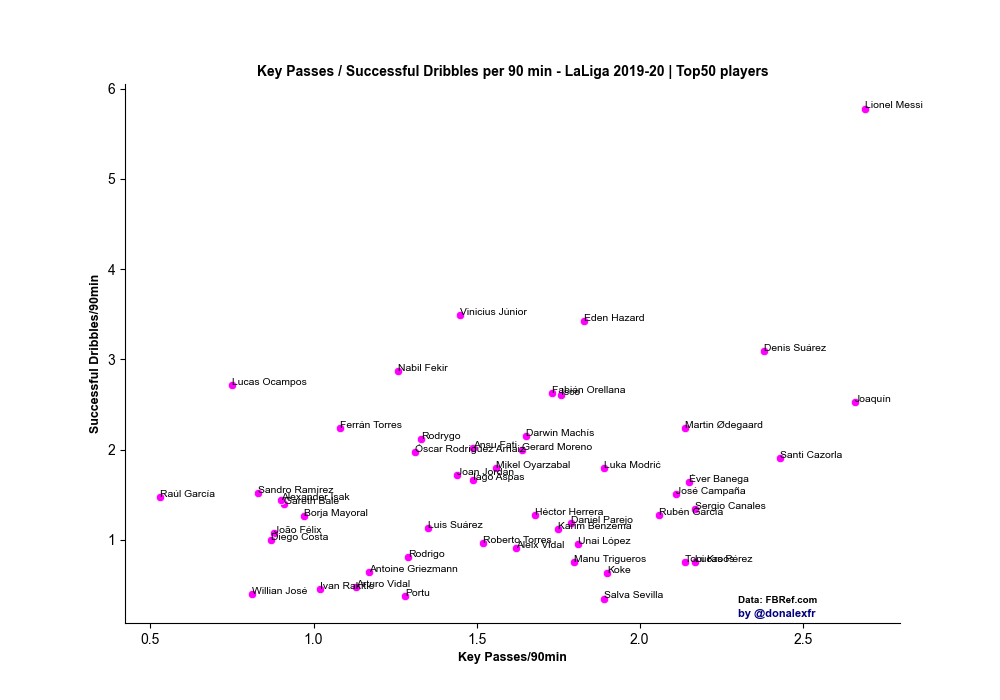

C:\Users\aleex\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [50]:
plt.figure(figsize=(10,7))
fig7=sns.scatterplot('KP','Succ',data=data.head(50),color='magenta')
sns.despine()
plt.title('Key Passes / Successful Dribbles per 90 min - LaLiga 2019-20 | Top50 players',size=10,weight='bold')
plt.xlabel('Key Passes/90min',size=9,weight='bold')
plt.ylabel('Successful Dribbles/90min',size=9,weight='bold')
plt.show()

In [51]:
for i, txt in enumerate(data.head(50).index):
    fig7.annotate(txt, (data.head(50)['KP'][i], data.head(50)['Succ'][i]),size=7.5)
plt.gca().annotate('Data: FBRef.com',(2.3,0.3),size=7,weight='bold')
plt.gca().annotate('by @donalexfr',(2.3,0.15),size=8,weight='bold',color='navy')

Text(2.3, 0.15, 'by @donalexfr')

In [52]:
plt.savefig('kpsucc.png',dpi=105)

In [53]:
chances = data['cc'].head(25).sort_values(ascending=True)
chances

Player
Raúl García          0.56
Arturo Vidal         1.24
Antoine Griezmann    1.31
Vinicius Júnior      1.52
Iago Aspas           1.57
Ansu Fati            1.58
Luis Suárez          1.71
Roberto Torres       1.78
Gerard Moreno        1.80
Darwin Machís        1.86
Daniel Parejo        1.88
Isco                 1.91
Karim Benzema        1.98
Salva Sevilla        2.00
Manu Trigueros       2.03
Eden Hazard          2.08
Luka Modrić          2.21
Toni Kroos           2.31
Sergio Canales       2.34
Lucas Pérez          2.35
Martin Ødegaard      2.35
Denis Suárez         2.66
Santi Cazorla        2.76
Joaquín              2.79
Lionel Messi         3.31
Name: cc, dtype: float64

<IPython.core.display.Javascript object>


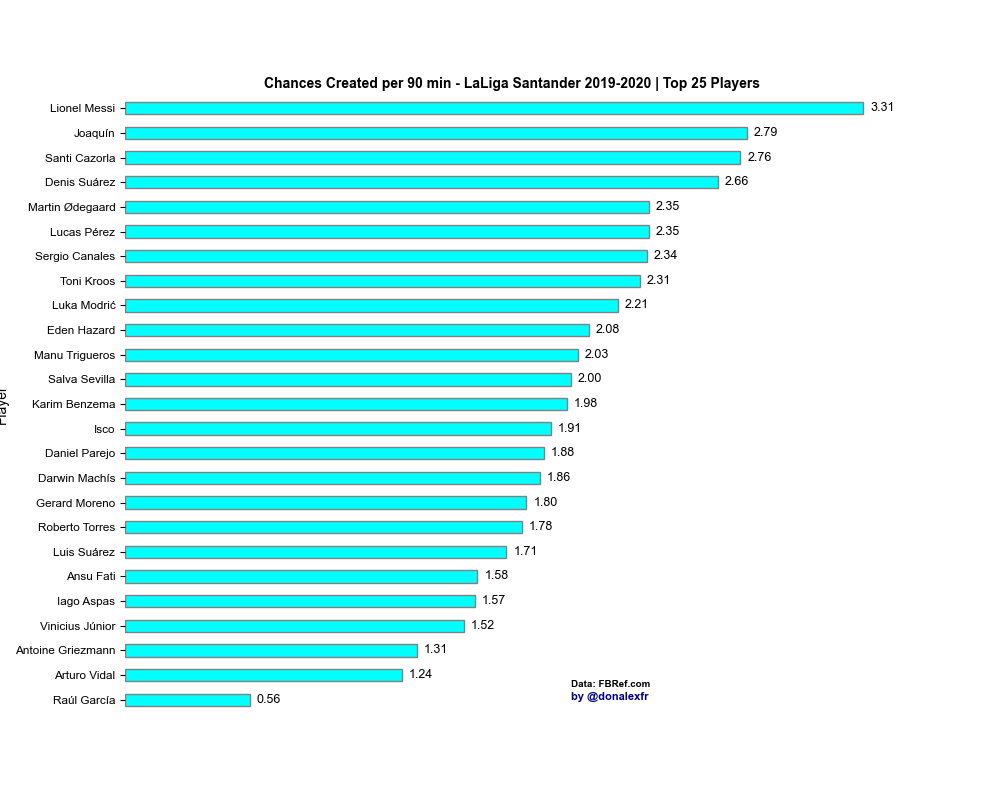

Text(0.5, 1.0, 'Chances Created per 90 min - LaLiga Santander 2019-2020 | Top 25 Players')

In [54]:
plt.figure()
fig9 = chances.plot.barh(figsize=(10,8),color='cyan',edgecolor='grey');
plt.title('Chances Created per 90 min - LaLiga Santander 2019-2020 | Top 25 Players',size=10,weight='bold')

In [55]:
for spine in plt.gca().spines.values():
    spine.set_visible(False) 
for item in plt.gca().yaxis.get_ticklabels():
    item.set_fontsize(8.5)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

In [56]:
rects = fig9.patches
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:.2f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha,
        size=9)                      # Horizontally align label differently for
fig9.annotate('Data: FBRef.com',(2,0.5),size=7,weight='bold')
fig9.annotate('by @donalexfr',(2,0),size=8,weight='bold',color='navy')

Text(2, 0, 'by @donalexfr')

In [57]:
plt.savefig('chances.png',dpi=105)

In [58]:
FW = data[data['Pos']=='FW'].append(data[data['Pos']=='FW,MF']).sort_values(by='cc',ascending=False).drop('Isco')
FW.head(20)

C:\Users\aleex\AppData\Local\Temp/ipykernel_14644/1495556748.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  FW = data[data['Pos']=='FW'].append(data[data['Pos']=='FW,MF']).sort_values(by='cc',ascending=False).drop('Isco')


,Nation,Pos,Squad,Min,Gls.1,Ast.1,G+A,xG+xA,Cmp%,KP,PPA,Succ,Carries,Miscon,Dispos,G/Sh,Effrate,Effrate/Carry,cc
Player,,,,,,,,,,,,,,,,,,,
Lionel Messi,ar ARG,"FW,MF",Barcelona,2.880,0.78,0.62,1.41,1.08,79.4,2.69,3.94,5.78,69.6,2.03,2.75,0.13,2.524719,3.627470,3.31
Lucas Pérez,es ESP,FW,Alavés,2.496,0.40,0.18,0.58,0.57,63.5,2.17,0.97,0.76,20.6,1.99,1.84,0.14,0.430685,2.090703,2.35
Eden Hazard,be BEL,"FW,MF",Real Madrid,1.077,0.08,0.25,0.33,0.43,85.4,1.83,1.17,3.42,55.2,2.00,3.00,0.05,0.518752,0.939768,2.08
Karim Benzema,fr FRA,FW,Real Madrid,3.141,0.60,0.23,0.83,0.74,84.2,1.75,1.66,1.12,33.6,1.69,1.20,0.14,1.057821,3.148277,1.98
Matías Vargas,ar ARG,"FW,MF",Espanyol,1.024,0.00,0.26,0.26,0.31,65.9,1.67,2.02,2.19,39.4,3.25,2.81,0.00,0.236424,0.600061,1.93
Adnan Januzaj,be BEL,"FW,MF",Real Sociedad,1.167,0.23,0.23,0.46,0.30,65.1,1.69,1.92,2.62,44.5,3.31,2.77,0.12,0.251157,0.564397,1.92
Mikel Oyarzabal,es ESP,"FW,MF",Real Sociedad,3.051,0.29,0.32,0.62,0.47,71.8,1.56,1.33,1.80,32.8,2.30,2.18,0.11,0.418071,1.274608,1.88
Darwin Machís,ve VEN,"FW,MF",Granada,2.129,0.30,0.21,0.51,0.41,62.0,1.65,0.97,2.15,26.9,2.15,1.52,0.08,0.430601,1.600746,1.86
Gerard Moreno,es ESP,"FW,MF",Villarreal,2.744,0.59,0.16,0.75,0.65,72.3,1.64,1.34,2.00,34.1,3.11,1.54,0.20,0.608699,1.785041,1.80


In [59]:
FW.to_excel('FW.xlsx',sheet_name='FW')

<IPython.core.display.Javascript object>


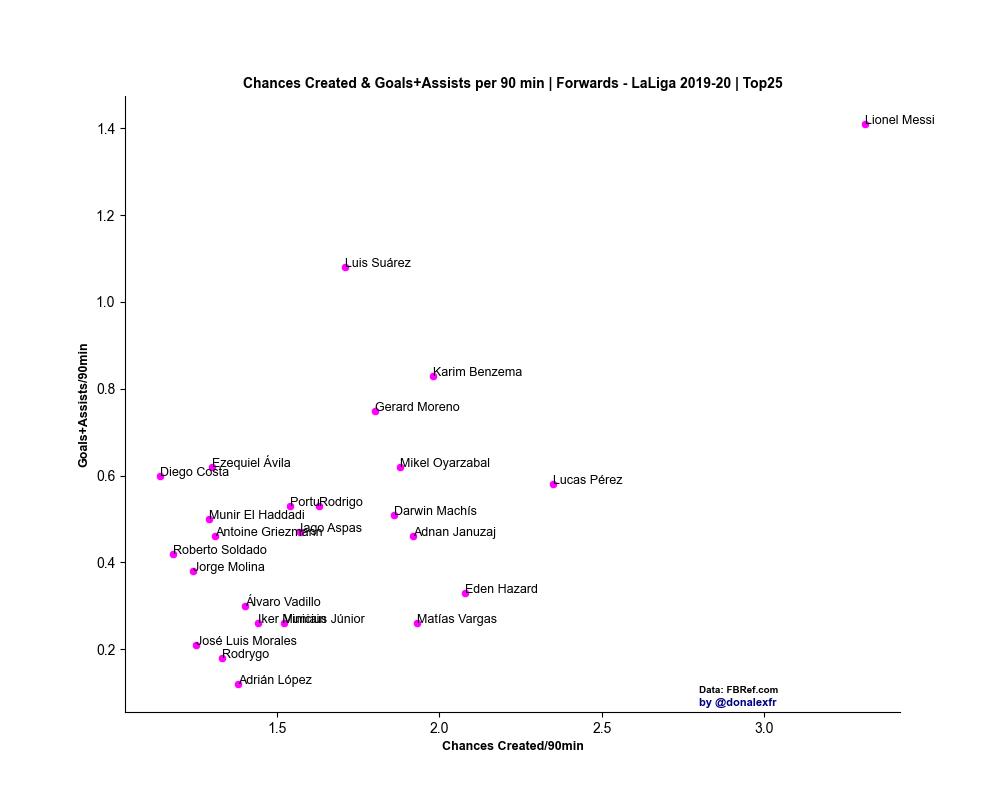

C:\Users\aleex\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [60]:
plt.figure(figsize=(10,8))
fig10=sns.scatterplot('cc','G+A',data=FW.head(25),color='magenta')
sns.despine()
plt.title('Chances Created & Goals+Assists per 90 min | Forwards - LaLiga 2019-20 | Top25',size=10,weight='bold')
plt.xlabel('Chances Created/90min',size=9,weight='bold')
plt.ylabel('Goals+Assists/90min',size=9,weight='bold')
plt.show()

In [61]:
for i, txt in enumerate(FW.head(25).index):
    fig10.annotate(txt, (FW.head(25)['cc'][i], FW.head(25)['G+A'][i]),size=9)
fig10.annotate('Data: FBRef.com',(2.8,0.1),size=7,weight='bold')
fig10.annotate('by @donalexfr',(2.8,0.07),size=8,weight='bold',color='navy')
plt.show()

In [62]:
plt.savefig('forwards.png',dpi=105)

In [63]:
data.columns

Index(['Nation', 'Pos', 'Squad', 'Min', 'Gls.1', 'Ast.1', 'G+A', 'xG+xA',
       'Cmp%', 'KP', 'PPA', 'Succ', 'Carries', 'Miscon', 'Dispos', 'G/Sh',
       'Effrate', 'Effrate/Carry', 'cc'],
      dtype='object')

In [64]:
cdeep = ['Nation','Pos','Squad','Gls.1', 'Ast.1', 'G+A', 'xG+xA','KP','Effrate','cc']
deep = data[cdeep].sort_values(by='Squad',ascending=False)

In [65]:
deep = deep.rename(columns={'G+A': 'GA','Ast.1':'Ast1'})
deep.head()

,Nation,Pos,Squad,Gls.1,Ast1,GA,xG+xA,KP,Effrate,cc
Player,,,,,,,,,,
Moi Gómez,es ESP,"FW,MF",Villarreal,0.19,0.16,0.35,0.24,0.89,0.242861,1.05
Santi Cazorla,es ESP,MF,Villarreal,0.40,0.33,0.73,0.55,2.43,1.004337,2.76
Vicente Iborra,es ESP,MF,Villarreal,0.03,0.07,0.10,0.11,0.27,0.079831,0.34
Samuel Chukwueze,ng NGA,"MF,FW",Villarreal,0.13,0.09,0.22,0.30,1.56,0.283099,1.65
Manu Trigueros,es ESP,MF,Villarreal,0.12,0.23,0.35,0.36,1.80,0.655320,2.03


In [66]:
from scipy import stats
import seaborn as sns
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms

In [67]:
reg = ols('GA ~ Effrate', data = deep).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                     GA   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     160.0
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           1.30e-26
Time:                        20:13:14   Log-Likelihood:                 80.110
No. Observations:                 181   AIC:                            -156.2
Df Residuals:                     179   BIC:                            -149.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1379      0.016      8.561      0.0

In [68]:
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
test = sms.het_breuschpagan(reg.resid,reg.model.exog)
for stat,value in zip(labels,test[:2]):
    print('{}: {:.3f}'.format(stat,value))

LM Statistic: 7.475
LM-Test p-value: 0.006


We have to assume there is heteroskedasticity

In [69]:
reg = ols('GA ~ Effrate', data = deep).fit(cov_type='HC3')
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                     GA   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     61.24
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           4.24e-13
Time:                        20:13:14   Log-Likelihood:                 80.110
No. Observations:                 181   AIC:                            -156.2
Df Residuals:                     179   BIC:                            -149.8
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1379      0.019      7.451      0.0

**Hay heteroscedasticidad, pero no parece que haya multicolinearidad ni autocorrelación, mientras que la distribución es normal con cola a la derecha. R2 = 0.47, con lo que el índice de eficiencia puede explicar el 47% de los goles y asistencias cada 90 minutos de los 181 jugadores de ataque de la Liga la pasada temporada.**

In [70]:
import statsmodels.api as sm

<IPython.core.display.Javascript object>


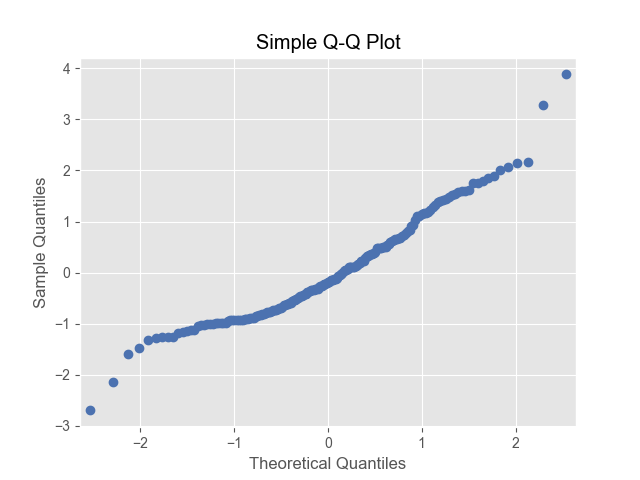

In [71]:
plt.style.use('ggplot')
a = sm.qqplot(reg.resid,fit=True)
plt.title('Simple Q-Q Plot')
plt.show()

<IPython.core.display.Javascript object>


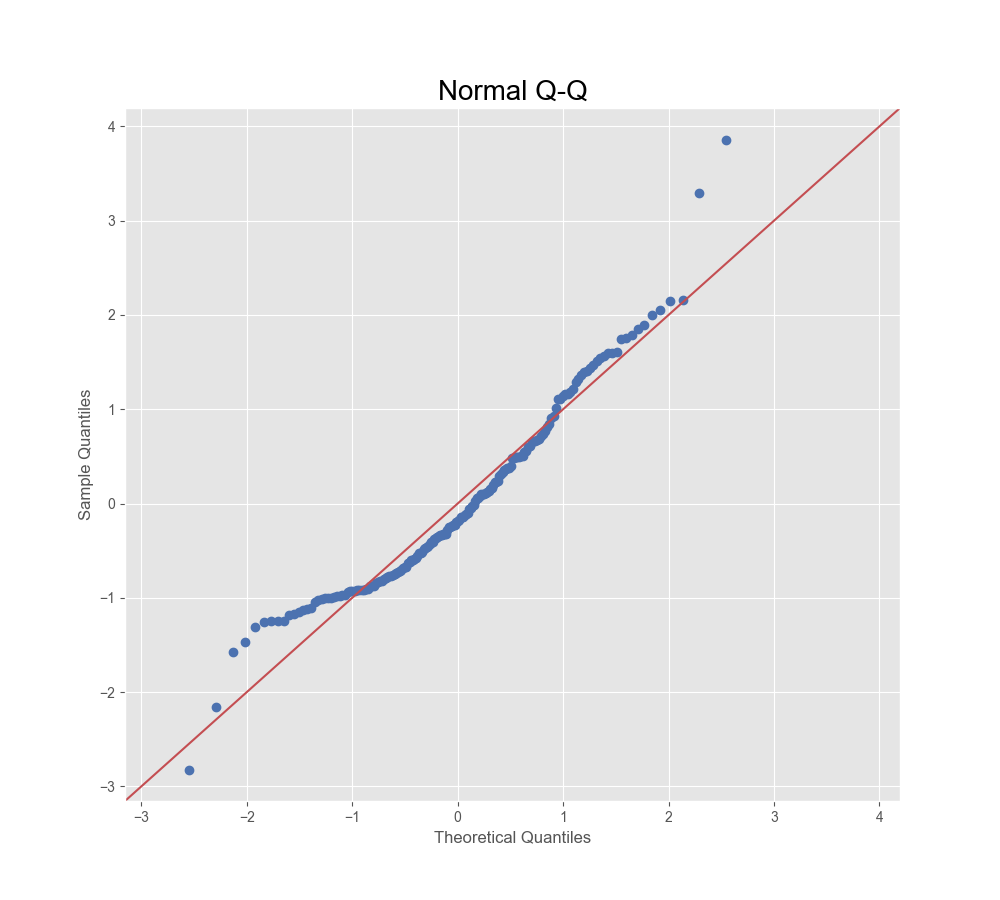

C:\Users\aleex\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


In [72]:
plt.rc('figure',figsize=(10,9))
plt.style.use('ggplot')

probplot = sm.ProbPlot(reg.get_influence().resid_studentized_internal,fit=True) #qqplot done based on studentized residuals
fig = probplot.qqplot(line='45',marker='o',color='black')
plt.title('Normal Q-Q',fontsize=20)
plt.show()

In [73]:
b,a,r_value,p_value,std_err = stats.linregress(x=deep.Effrate,y=deep.GA)
rsq=r_value**2
rsq.round(2)

0.47

<IPython.core.display.Javascript object>


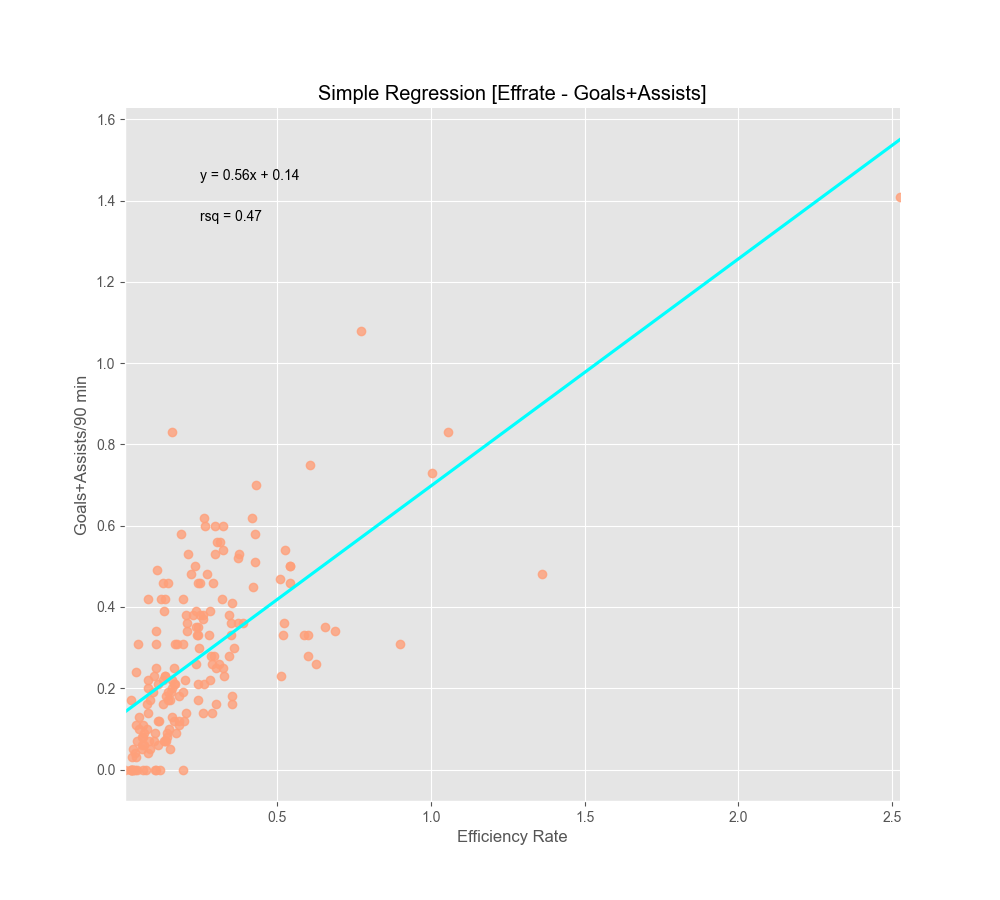

In [74]:
plt.figure()
sns.regplot(x='Effrate', y='GA', data = deep,ci=False,line_kws = {'color':'cyan'},color='lightsalmon')
plt.xlabel('Efficiency Rate')
plt.ylabel('Goals+Assists/90 min')
plt.title('Simple Regression [{} - {}]'.format('Effrate','Goals+Assists'))
plt.annotate('y = {}x + {}'.format(b.round(2),a.round(2)),(0.25,1.45))
plt.annotate('rsq = {}'.format(rsq.round(2)),(0.25,1.35))
sns.set(rc={'figure.figsize':(6,6)},style='white')
sns.despine()
plt.show()

In [75]:
deep.to_excel('data.xlsx',sheet_name='data')